<img SRC="img01.png" />
<center><h1 Style="color:#1E90FF">Analisis de Datos</h1></center>
<center><h5>Universidad Castro Carazo</h5></center>
<center><h6>2-Cuatrimestre 2022</h6></center>
</br>
<p Style="text-align: justify; color: #E9967A" Style>Este notebook contiene el analisis de los datos de los vehiculos a la venta por parte de la empresa Pk2, esta empresa 
se encuentra interesada en responder una pregunta de negocio particular.
Como se puede incrementar las ventas de autos de segunda mano?
Para esto se realiza un analisis de conjunto de datos facilitado por la empresa a efectos de poder brindar conocimiento 
sobrelas distribuciones de sus lotes de venta, los autos con mayor precio, o caracteristicas de los autos, 
esto para dotar de insumos suficientes a la toma de decisiones.</p>
</br>
<a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Fuente de Datos para el analisis</a>


<h2 Style= "color: #FF4500">1. Carga y estandarizacion de los set de datos</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Importar las librerias necesarias.</li>
    <li>Importar el o los set de datos</li>
    <li>Revisar los encabezados de los Dataframes</li>
    <li>Si y solo Si tenemos mas de 2 set de datos - Unir los set de datos en un unico Dataframe</li>
</ol>
<h3 Style="color:#6B8E23">1.1 Importar las librerias</h3>

In [1]:
import pandas as pd             #se usa para el manejo de DataFrames
import numpy as np              #se usa para manejar las estructuras de datos (listas, duplas, arrays, diccionarios)
import matplotlib.pyplot as ptl #se usa para el manejo de graficos

<h3 Style="color:#6B8E23">1.2 Importar el set de datos</h3>

In [2]:
cols = ["symboling", "normalized", "make", "fuel", "aspiration", "doors",
"style", "wheels", "engine", "base", "length", "width", "heingt",
"curb", "engineType", "Cylinders", "engine-size", "system", "bore", "stroke",
"compression", "horsepower", "peak", "City", "Higway", "price"]

df_1er_autos = pd.read_csv("autos.csv", names = cols) #Aca se le indica al Dataframe que tome los datos dentro de "cols"
                                                  #y los use como headers
df_2do_autos = pd.read_csv("Autos 1.csv", names = cols)

In [3]:
df_1er_autos.shape #Permite conocer el tamaño del Dataframe.

(197, 26)

In [4]:
df_2do_autos.shape

(29, 26)

In [5]:
df_1er_autos.head(10) #Para poder visualizar las primeras 10 observaciones

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [6]:
df_1er_autos.tail(10) #Para poder visualizar las ultimas 10 observaciones

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,9980
191,0,?,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295
192,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.40,23.0,68,4500,33,38,13845
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.40,9.0,88,5500,25,31,12290
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [7]:
df_1er_autos.describe() #Da una serie de estadisticas del set de datos (conteo,media,desv std,min,cuartiles,max) 
                        #para aquellos datos que sean numericos

,symboling,base,length,width,heingt,curb,engine-size,compression,City,Higway
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.913706,98.409645,173.450254,65.812690,53.628934,2534.796954,126.263959,10.128020,25.416244,30.984772
std,1.202746,5.866965,12.213912,2.128306,2.438891,520.401159,42.282594,3.934467,6.566717,6.908644
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2140.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,96.500000,172.600000,65.400000,53.900000,2405.000000,110.000000,9.000000,25.000000,30.000000
75%,2.000000,100.400000,178.500000,66.500000,55.500000,2844.000000,141.000000,9.400000,30.000000,36.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


<h3 Style="color:#6B8E23">1.3 Revisar encabezados de los set de datos</h3>

In [8]:
df_1er_autos.columns #Para revisar el orden de las columnas

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [9]:
df_2do_autos.columns

Index(['symboling', 'normalized', 'make', 'fuel', 'aspiration', 'doors',
       'style', 'wheels', 'engine', 'base', 'length', 'width', 'heingt',
       'curb', 'engineType', 'Cylinders', 'engine-size', 'system', 'bore',
       'stroke', 'compression', 'horsepower', 'peak', 'City', 'Higway',
       'price'],
      dtype='object')

In [10]:
df_1er_autos.info() #Da informacion sobre los tipos de datos , los que se describen como object son caracteres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symboling    197 non-null    int64  
 1   normalized   197 non-null    object 
 2   make         197 non-null    object 
 3   fuel         197 non-null    object 
 4   aspiration   197 non-null    object 
 5   doors        197 non-null    object 
 6   style        197 non-null    object 
 7   wheels       197 non-null    object 
 8   engine       197 non-null    object 
 9   base         197 non-null    float64
 10  length       197 non-null    float64
 11  width        197 non-null    float64
 12  heingt       197 non-null    float64
 13  curb         197 non-null    int64  
 14  engineType   197 non-null    object 
 15  Cylinders    197 non-null    object 
 16  engine-size  197 non-null    int64  
 17  system       197 non-null    object 
 18  bore         197 non-null    object 
 19  stroke  

<h3 Style="color:#6B8E23">1.4 Unir archivos en un solo DataFrame</h3>

In [11]:
unionArchivos = [df_1er_autos, df_2do_autos] #Esto es una lista de DataFrames
dfAutos = pd.concat(unionArchivos)
dfAutos.shape #Para obtener el dimensionamiento del numero de registros/numero columnas

(226, 26)

In [12]:
dfAutos.head(3) #Mostrar las primeras tres rows con todas las columnas

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [13]:
dfAutos.iloc[:, 0:2] #Agarrar todas las rows de las columnas 0 y 1 (no incluye la columna 2 porque el comando es exclusivo)

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
...,...,...
24,0,?
25,0,?
26,-2,103
27,-1,74


In [14]:
dftem = dfAutos.iloc[:, 0:2] #Pasar a dftem todas las rows de las columnas 0 y 1 de dfAutos

In [15]:
dftem.head(6) #Mostrar las primeras 6 rows con todas las columnas de dftem

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
5,2,?


In [16]:
dftem #Para mostrar todas las rows/columnas, si son muchas rows va a mostrar las primeras y ultimas rows del dataFrame

,symboling,normalized
0,3,?
1,3,?
2,1,?
3,2,164
4,2,164
...,...,...
24,0,?
25,0,?
26,-2,103
27,-1,74


In [17]:
dftemp = dfAutos.iloc[[0,3,6,24],[0,5,6]] #Para escoger rows y columnas especificas

In [18]:
dftemp

,symboling,doors,style
0,3,two,convertible
3,2,four,sedan
6,1,four,sedan
24,1,four,hatchback


In [19]:
df_Autos = dfAutos #Esto es una copia de seguridad del DataFRame original

In [20]:
df_Autos.shape

(226, 26)

<h2 Style= "color: #FF4500">2. Manejo de valores faltantes</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Identificar como se muestran los valores faltantes (null, espacio vacio, ?) y estandarizarlos (NaN)</li>
    <li>Contar la cantidad de valores NaN faltantes por variable (columna)</li>
    <li>Analisis de imputacion (el promedio / ML) para el caso de los numericos</li>
    <li>Analisis de imputacion (con el valor mas frecuente de la columna / ML) para el caso de los caracteres</li>
    <li>Eliminar filas o columnas con valores faltantes</li>
</ol>
<h3 Style="color:#6B8E23">2.1 Identificar como se muestran los valores faltantes y estandarizarlos</h3>

In [21]:
df_Autos.head(15) #Identificar los valores faltantes, en este caso son los "?"

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [22]:
df_Autos.replace("?", np.nan, inplace = True) #Esto es estandarizar (buscar, identificar, remplazar por NaN)
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


<h3 Style="color:#6B8E23">2.2 Contar valores faltantes por columna</h3>

In [23]:
valoresPerdidos = df_Autos.isnull() #Va a identificar los valores NaN y los va a guardar en el DataFrame valoresPerdidos

In [24]:
valoresPerdidos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
for column in valoresPerdidos.columns.values.tolist(): #Convertir cada columna a una lista
    print (column) #Imprime el nombre de la columna
    print (valoresPerdidos[column].value_counts()) #Imprime el conteo de falsos/verdaderos de cada columna
    print ("") #Imprime un Enter

symboling
False    226
Name: symboling, dtype: int64

normalized
False    180
True      46
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    222
True       4
Name: bore, dtype: int64

stroke
False    222
True     

<h3 Style="color:#6B8E23">2.3 Imputar Datos Numericos</h3>

In [26]:
avg_normalized = df_Autos["normalized"].astype("float").mean(axis=0) #Vamos a trabajar la columna NORMALIZED, se le dice axis=0 para agarrar la columna completa, si se pone axis=1 agarra la fila completa
print ("La media del normalized: ", avg_normalized)
                                                            

La media del normalized:  122.28333333333333


In [27]:
df_Autos["normalized"].replace(np.nan, 122, inplace = True) #Remplazar todos los valores faltantes por la media de la columna
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


imputar las sig columnas bore, stroke, horsepower, peak, price

In [28]:
avg_bore = df_Autos["bore"].astype("float").mean(axis=0) #Imputar columna BORE
print ("La media del bore: ", avg_bore)

La media del bore:  3.319459459459461


In [29]:
df_Autos["bore"].replace(np.nan, 3, inplace = True) #Remplazar todos los valores faltantes por la media #Remplazar todos los valores faltantes por la media
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [30]:
avg_stroke = df_Autos["stroke"].astype("float").mean(axis=0) #Imputar columna STROKE
print ("La media del stroke: ", avg_stroke)

La media del stroke:  3.2785135135135075


In [31]:
df_Autos["stroke"].replace(np.nan, 3, inplace = True)  #Remplazar todos los valores faltantes por la media de la columna
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [32]:
avg_horsepower = df_Autos["horsepower"].astype("float").mean(axis=0) #Imputar columna HORSEPOWER
print ("La media del horsepower: ", avg_horsepower)

La media del horsepower:  102.98214285714286


In [33]:
df_Autos["horsepower"].replace(np.nan, 103, inplace = True)  #Remplazar todos los valores faltantes por la media de la columna
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [34]:
avg_peak = df_Autos["peak"].astype("float").mean(axis=0) #Imputar columna PEAK
print ("La media del peak: ", avg_peak)

La media del peak:  5100.892857142857


In [35]:
df_Autos["peak"].replace(np.nan, 5101, inplace = True)  #Remplazar todos los valores faltantes por la media de la columna
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [36]:
avg_price = df_Autos["price"].astype("float").mean(axis=0) #Imputar columna PRICE
print ("La media del price: ", avg_price)

La media del price:  12780.941441441442


In [37]:
df_Autos["price"].replace(np.nan, 12781, inplace = True)  #Remplazar todos los valores faltantes por la media de la columna
df_Autos.head(3)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [38]:
valoresPerdidos = df_Autos.isnull() #Va a identificar los valores NaN y los va a guardar en el DataFrame valoresPerdidos
for column in valoresPerdidos.columns.values.tolist(): #Convertir cada columna a una lista
    print (column) #Imprime el nombre de la columna
    print (valoresPerdidos[column].value_counts()) #Imprime el conteo de falsos/verdaderos de cada columna
    print ("") #Imprime un Enter

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    224
True       2
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    226
Name: bore, dtype: int64

stroke
False    226
Name: stroke, dtype: int64

compres

<h3 Style="color:#6B8E23">2.4 Imputar Datos Tipo Caracter</h3>

Vamos a trabajar con la columna DOORS que es de tipo caracter, la teoria inidca que cuando se trabaja con caracteres, y tenemos datos faltantes, debemos sustituirlos por los valores mas frecuente de la columna. Esto se hace para lograr la menor desviacion posible.

In [39]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
df_Autos["doors"].value_counts() #Devuelve un conteo de cada valor en la columna

four    124
two     100
Name: doors, dtype: int64

In [41]:
df_Autos["doors"].value_counts().idxmax() #Devuelve el valor con mayor cantidad de ocurrencias

'four'

In [42]:
df_Autos["doors"].replace(np.nan, "four", inplace = True) #Reemplazamos los valores faltantes por "four" (mas freq)

In [43]:
valoresPerdidos = df_Autos.isnull() #Va a identificar los valores NaN y los va a guardar en el DataFrame valoresPerdidos
for column in valoresPerdidos.columns.values.tolist(): #Convertir cada columna a una lista
    print (column) #Imprime el nombre de la columna
    print (valoresPerdidos[column].value_counts()) #Imprime el conteo de falsos/verdaderos de cada columna
    print ("") #Imprime un Enter

symboling
False    226
Name: symboling, dtype: int64

normalized
False    226
Name: normalized, dtype: int64

make
False    226
Name: make, dtype: int64

fuel
False    226
Name: fuel, dtype: int64

aspiration
False    226
Name: aspiration, dtype: int64

doors
False    226
Name: doors, dtype: int64

style
False    226
Name: style, dtype: int64

wheels
False    226
Name: wheels, dtype: int64

engine
False    226
Name: engine, dtype: int64

base
False    226
Name: base, dtype: int64

length
False    226
Name: length, dtype: int64

width
False    226
Name: width, dtype: int64

heingt
False    226
Name: heingt, dtype: int64

curb
False    226
Name: curb, dtype: int64

engineType
False    226
Name: engineType, dtype: int64

Cylinders
False    226
Name: Cylinders, dtype: int64

engine-size
False    226
Name: engine-size, dtype: int64

system
False    226
Name: system, dtype: int64

bore
False    226
Name: bore, dtype: int64

stroke
False    226
Name: stroke, dtype: int64

compression
False   

<h3 Style="color:#6B8E23">2.5 Eliminar filas con valores faltantes</h3>

Si se eliminan filas debemos asegurarnos que no van a representar un alto porcentaje de los datos (5%-8% es aceptable).

In [44]:
df_Autos.dropna(subset = ["price"], axis = 0, inplace = True) #Borrar los valores faltantes de la columna PRICE
df_Autos.reset_index(drop = True, inplace = True) #La orden anterior tambien borra los indices de los filas, para eso vamos a resetear los indices.

In [45]:
df_Autos

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0,122,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,...,97,idi,3.01,3.4,23.0,68,4500,33,38,13845
222,0,122,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
223,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
224,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415


<h2 Style= "color: #FF4500">3. Estandarizacion de datos</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Verificar el dominio de las variables y se ajusta si es necesario</li>
    <li>Convertir valores en funcion de la interpretacion</li>
    <li>Normalizar los datos con valores distintos para que sus valores queden entre 0 y 1</li>
    <li>Agrupar datos (Binning)</li>
</ol>
<h3 Style="color:#6B8E23">3.1 Verificar el dominio de las variables</h3>

In [46]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Revisamos la fuente de datos para verificar los tipos de datos que deberian tener cada una de las variables.

In [47]:
df_Autos.dtypes

symboling        int64
normalized      object
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore            object
stroke          object
compression    float64
horsepower      object
peak            object
City             int64
Higway           int64
price           object
dtype: object

In [48]:
df_Autos[["normalized", "peak"]] =  df_Autos[["normalized", "peak"]].astype("int") #Cambiamos el tipo de dato para que coincida con el tipo de variable que le corresponde

In [49]:
df_Autos[["bore", "stroke", "price"]] =  df_Autos[["bore", "stroke", "price"]].astype("float")

In [50]:
df_Autos.dtypes

symboling        int64
normalized       int64
make            object
fuel            object
aspiration      object
doors           object
style           object
wheels          object
engine          object
base           float64
length         float64
width          float64
heingt         float64
curb             int64
engineType      object
Cylinders       object
engine-size      int64
system          object
bore           float64
stroke         float64
compression    float64
horsepower      object
peak             int64
City             int64
Higway           int64
price          float64
dtype: object

<h3 Style="color:#6B8E23">3.2 Convertir valores en funcion de su interpretacion</h3>

In [51]:
df_Autos.head(5)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,engine-size,system,bore,stroke,compression,horsepower,peak,City,Higway,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
#Vamos a convertir los datos de la columna City de mpg a kmL. 
#No vamos a sutituir la columna sino crear otra columna equivalente.
df_Autos["city-L/100km"] = 235/df_Autos["City"]
df_Autos.head(5) #Verificamos el resultado

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,system,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


In [53]:
#Vamos a convertir los datos de la columna Highway de mpg a kmL. 
#No vamos a sutituir la columna sino crear otra columna equivalente.
df_Autos["highway-L/100km"] = 235/df_Autos["Higway"]
df_Autos.head(5) #Verificamos el resultado

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


<h3 Style="color:#6B8E23">3.3 Normalizacion de Datos</h3>

In [54]:
#Se refiere a lograr que dos o mas datos sean comparables entre si.
df_Autos.info() #Vamos a traer el detalle de las columnas, y vamos a trabajar en las columnas 10,11 y 12 (length, width y height)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   symboling        226 non-null    int64  
 1   normalized       226 non-null    int64  
 2   make             226 non-null    object 
 3   fuel             226 non-null    object 
 4   aspiration       226 non-null    object 
 5   doors            226 non-null    object 
 6   style            226 non-null    object 
 7   wheels           226 non-null    object 
 8   engine           226 non-null    object 
 9   base             226 non-null    float64
 10  length           226 non-null    float64
 11  width            226 non-null    float64
 12  heingt           226 non-null    float64
 13  curb             226 non-null    int64  
 14  engineType       226 non-null    object 
 15  Cylinders        226 non-null    object 
 16  engine-size      226 non-null    int64  
 17  system          

In [55]:
#Antes de hacer cualquier dato comparable, necesitamos verlos, para eso vamos a crear un DataFrame temporal con
# solo esas columnas.

In [56]:
dfTemp = df_Autos[['length','width','heingt']]
dfTemp.head(5)

,length,width,heingt
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [57]:
df_Autos['length'] = df_Autos['length']/df_Autos['length'].max() #Con este codigo lo que hacemos es lograr que
#todos los valores de la columna 'length' oscilen entre 0 y 1.
df_Autos['width'] = df_Autos['width']/df_Autos['width'].max() #Same
df_Autos['heingt'] = df_Autos['heingt']/df_Autos['heingt'].max() #Same

In [58]:
dfTemp = df_Autos[['length','width','heingt']] #Sobreescribimos el Dataframe Temporal
dfTemp.head(5)

,length,width,heingt
0,0.811148,0.886584,0.816054
1,0.811148,0.886584,0.816054
2,0.822681,0.905947,0.876254
3,0.848630,0.915629,0.908027
4,0.848630,0.918396,0.908027


<h3 Style="color:#6B8E23">3.4 Binning</h3>

In [60]:
df_Autos.head(5) #Vamos a tomar la columna de Horsepower y la vamos a dividir en 3 categorias

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818


In [61]:
df_Autos[['horsepower']] = df_Autos[['horsepower']].astype('int') #convertimos los datos de la columna a INT
df_Autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   symboling        226 non-null    int64  
 1   normalized       226 non-null    int64  
 2   make             226 non-null    object 
 3   fuel             226 non-null    object 
 4   aspiration       226 non-null    object 
 5   doors            226 non-null    object 
 6   style            226 non-null    object 
 7   wheels           226 non-null    object 
 8   engine           226 non-null    object 
 9   base             226 non-null    float64
 10  length           226 non-null    float64
 11  width            226 non-null    float64
 12  heingt           226 non-null    float64
 13  curb             226 non-null    int64  
 14  engineType       226 non-null    object 
 15  Cylinders        226 non-null    object 
 16  engine-size      226 non-null    int64  
 17  system          

In [62]:
cat = np.linspace(min(df_Autos['horsepower']), max(df_Autos['horsepower']), 4) #Tomamos el minimo y el maximo de
# la columna y vamos a generar 4 valores, lo cual es igual a 3 categorias
cat

array([ 48., 128., 208., 288.])

In [63]:
nombres = ["bajo", "medio", "alto"]
df_Autos["horsepower-bins"] = pd.cut(df_Autos['horsepower'], bins = cat, labels = nombres, include_lowest = True)
#Creamos otra columna en la que vamos a usar pandas para cortar lo que tengo en la columna original en las 
#diferentes categorias
df_Autos[["horsepower","horsepower-bins"]].head(5)

,horsepower,horsepower-bins
0,111,bajo
1,111,bajo
2,154,medio
3,102,bajo
4,115,bajo


In [64]:
df_Autos["horsepower-bins"].value_counts() #Para ver una vista general de la columna segun categoria

bajo     184
medio     40
alto       2
Name: horsepower-bins, dtype: int64

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt #Importar la libreria para graficar

(array([184.,   0.,   0.,   0.,   0.,  40.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

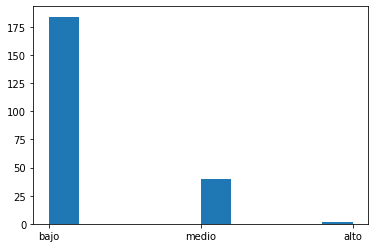

In [67]:
plt.hist(df_Autos["horsepower-bins"]) #Para visualizar un histograma

<function matplotlib.pyplot.show(close=None, block=None)>

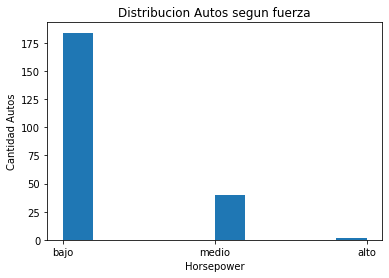

In [74]:
plt.hist(df_Autos["horsepower-bins"]) #Para visualizar un histograma sin los valores del header e incluir titulo, 
#y Etiqueta de ejes X y Y
plt.xlabel("Horsepower")
plt.ylabel("Cantidad Autos")
plt.title("Distribucion Autos segun fuerza")
plt.show

In [75]:
df_Autos.head(10)

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km,horsepower-bins
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,11.190476,8.703704,bajo
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,11.190476,8.703704,bajo
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,12.368421,9.038462,medio
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,9.791667,7.833333,bajo
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,13.055556,10.681818,bajo
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500,19,25,15250.0,12.368421,9.400000,bajo
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,17710.0,12.368421,9.400000,bajo
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500,19,25,18920.0,12.368421,9.400000,bajo
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500,17,20,23875.0,13.823529,11.750000,medio
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.0,160,5500,16,22,12781.0,14.687500,10.681818,medio


<h2 Style= "color: #FF4500">4. Visualizacion de Datos</h2>
<p>Que se hace en esta etapa?</p>
<ol>
    <li>Responder las preguntas de negocio</li>
    <li>Liberar conocimiento</li>
    <li>Generar Informe al Negocio</li>
</ol>
<h3 Style="color:#6B8E23">4.1 Responder las preguntas de negocio</h3>
<a href="https://matplotlib.org/stable/gallery/index">MATPLOTLIB</a>

In [77]:
gf1 = df_Autos.groupby(['horsepower-bins']).count() #Para agrupar todo el set de datos en funcion de los bins
gf1

,symboling,normalized,make,fuel,aspiration,doors,style,wheels,engine,base,...,bore,stroke,compression,horsepower,peak,City,Higway,price,city-L/100km,highway-L/100km
horsepower-bins,,,,,,,,,,,,,,,,,,,,,
bajo,184,184,184,184,184,184,184,184,184,184,...,184,184,184,184,184,184,184,184,184,184
medio,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
alto,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [79]:
gf1 = df_Autos.groupby(['horsepower-bins']).count() #Para agrupar todo el set de datos en funcion de los bins
gf1 = gf1.iloc[:,:1] #Para cortar el set de datos y tan solo traerme a gf1 todas las filas y de la columna 0 a la 1
gf1


,symboling
horsepower-bins,
bajo,184
medio,40
alto,2


In [80]:
#Para comparar usamos un grafico de barras. (horizontal o vertical)
eje_x = ("Bajo", "Medio", "Alto")#Forma manual
eje_y = gf1['symboling'].tolist()#Forma automatica


In [81]:
eje_y

[184, 40, 2]

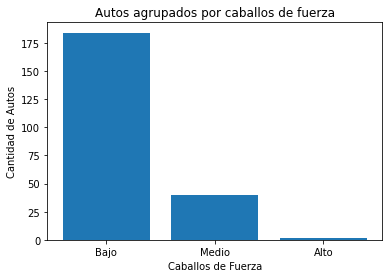

<Figure size 1080x1440 with 0 Axes>

In [88]:
#Para crear la grafica
plt.bar(eje_x, eje_y)

#Leyenda en el eje Y
plt.ylabel('Cantidad de Autos')

#Leyenda en el eje X
plt.xlabel('Caballos de Fuerza')

#Titulo del Grafico
plt.title('Autos agrupados por caballos de fuerza')

#Tamano del GRafico
plt.figure(figsize = (15,20))
plt.show()